## KPIs

In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib as plt

In [2]:
start = dt.date.today() - dt.timedelta(1825)
end = dt.date.today()

ohlcv = yf.download("CBA.ax", start, end)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

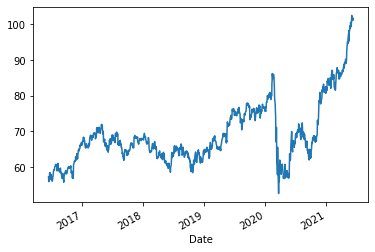

In [3]:
ohlcv["Adj Close"].plot()

In [4]:
def CAGR(DF):
    df = DF.copy()
    df["daily return"] = DF["Adj Close"].pct_change()
    df["cumulitive return"] = (1 + df["daily return"]).cumprod() 
    n = len(df)/252 
    CAGR = (df["cumulitive return"][-1])**(1/n) - 1 
    print("CAGR:",CAGR)
    return CAGR

def volatility(DF):
    df = DF.copy()
    df["daily return"] = DF["Adj Close"].pct_change()
    vol = df["daily return"].std() * np.sqrt(252) 
    print("Vol:",vol)
    return vol

def sharpe(DF, rf):
    df = DF.copy()
    sharpe = (CAGR(df) - rf)/volatility(df)
    print("Sharpe:",sharpe)
    return sharpe

CAGR(ohlcv)
volatility(ohlcv)
sharpe(ohlcv, 0.02)

CAGR: 0.12037919653437457
Vol: 0.2285866908371084
CAGR: 0.12037919653437457
Vol: 0.2285866908371084
Sharpe: 0.43912966309095003


0.43912966309095003

## Backtesting

In [5]:
#Strategy: starting with 6 stocks and replacing the worst performing stocks each month with the best performing stocks from a list

In [6]:
start = dt.date.today()-dt.timedelta(395)
end = dt.date.today()-dt.timedelta(30)

In [7]:
asx_data = pd.read_html("https://en.wikipedia.org/wiki/S%26P/ASX_200", header=0)

asx_table = asx_data[0]

asx_top30 = asx_table.sort_values(by=["Market Capitalisation"], ascending=False)[:30] #Picking the top 30 stocks in ASX200 by market cap
tickers = asx_top30["Code"]

tickers

40     CBA
28     BHP
57     CSL
188    WBC
13     ANZ
73     FMG
112    NAB
109    MQG
76     GMG
194    WOW
190    WES
179    TLS
150    RIO
195    WPL
178    TCL
16     APT
6      ALL
54     COL
159    SCG
156    S32
114    NCM
174    SUN
144    QBE
176    SYD
38     BXB
74     FPH
53     COH
21     ASX
172    STO
149    RHC
Name: Code, dtype: object

In [8]:
#Creating list of top 30 stocks and their monthly returns
stock_list = {} 
monthly_return_df = pd.DataFrame()

for item in tickers:
    stock_list[item] = yf.download(item+".ax", start, end, interval="1mo")
    stock_list[item].dropna(inplace=True)
    stock_list[item]["gain"] = stock_list[item]["Adj Close"].pct_change()
    monthly_return_df[item] = stock_list[item]["gain"]
    monthly_return_df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [9]:
monthly_return_df

,CBA,BHP,CSL,WBC,ANZ,FMG,NAB,MQG,GMG,WOW,...,NCM,SUN,QBE,SYD,BXB,FPH,COH,ASX,STO,RHC
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,0.025641,0.025963,-0.058885,-0.047911,-0.036481,0.257040,-0.030735,0.041231,0.151370,0.037554,...,0.115763,-0.073673,0.118510,-0.077601,-0.008280,0.007004,0.006828,-0.031975,-0.005660,-0.068250
2020-08-01,-0.041011,0.031565,0.058904,0.026331,0.017817,0.000574,0.015289,0.034092,0.081512,0.030765,...,-0.091529,0.087719,0.070636,0.121778,0.028757,0.018740,0.010146,0.056745,0.075901,0.049693
2020-09-01,-0.055259,-0.060934,0.003461,-0.039909,-0.044997,-0.011932,-0.010039,-0.063665,-0.020208,-0.086280,...,-0.015312,-0.081864,-0.185490,0.024476,-0.054103,-0.088849,0.030445,-0.072361,-0.134908,0.015678
2020-10-01,0.085049,-0.032155,0.007219,0.063539,0.092334,0.065644,0.047887,0.060049,0.025641,0.060253,...,-0.064020,-0.028402,-0.041812,-0.069966,-0.075086,0.072971,0.071616,-0.002937,-0.030738,-0.056447
2020-11-01,0.145610,0.126998,0.034149,0.123953,0.203615,0.049511,0.230645,0.094043,0.015217,-0.030922,...,-0.079001,0.228989,0.212121,0.231193,0.142857,0.023483,0.038835,-0.031646,0.302326,0.011227
2020-12-01,0.038447,0.114526,-0.047750,-0.021516,0.020880,0.285244,0.001095,0.008272,0.012313,0.063007,...,-0.042703,-0.034688,-0.147000,-0.044709,-0.032847,-0.077771,-0.142546,-0.066269,0.017857,-0.013799
2021-01-01,0.017050,0.026632,-0.040469,0.090862,0.044493,-0.069996,0.041593,-0.051127,-0.057722,0.039430,...,-0.025601,0.034908,-0.058617,-0.107644,-0.002830,0.048421,0.044656,-0.002917,0.038278,0.012705
2021-02-01,-0.023351,0.127870,-0.033601,0.127307,0.103754,0.106471,0.046729,0.084323,-0.063348,-0.035732,...,-0.019108,-0.013889,0.156912,0.024476,-0.063387,-0.160681,0.070756,-0.058365,0.110599,0.048118
2021-03-01,0.074336,-0.077956,0.007845,0.024769,0.076806,-0.170884,0.055195,0.072642,0.094203,0.037310,...,-0.001064,0.021215,0.035522,0.056314,0.068687,0.084102,-0.002081,0.051035,-0.008705,0.015151


In [10]:
def strategy(DF, m, x):
    df = DF.copy()  
    x = 3 #no. of stocks to replace
    m = 6 #no. of stocks in portfolio each month
    portfolio = ["CBA", "BHP", "CSL", "WBC", "ANZ", "FMG"] #top 6 stocks at beginning of period  
    monthly_return_portfolio = [0] 
    monthly_stocks = pd.DataFrame() 
    for i in range(len(df)):
        monthly_return_portfolio.append(df[portfolio].iloc[i,:].mean())
        bad_stocks = df[portfolio].iloc[i,:].sort_values(ascending=True)[:x]
        portfolio = [t for t in portfolio if t not in bad_stocks]
        fill = m - len(portfolio)
        new_stocks = df.iloc[i,:].sort_values(ascending=False)[:fill].index.tolist()
        portfolio = portfolio + new_stocks
        print(portfolio)
    monthly_stocks_return_df = pd.DataFrame(np.array(monthly_return_portfolio), columns=["monthly_return_portfolio"])
    return monthly_stocks_return_df

strategy(monthly_return_df, 6, 3)

['CBA', 'BHP', 'FMG', 'FMG', 'GMG', 'APT']
['BHP', 'GMG', 'APT', 'APT', 'SYD', 'SCG']
['GMG', 'SYD', 'SCG', 'ALL', 'TCL', 'COH']
['GMG', 'ALL', 'COH', 'APT', 'ANZ', 'CBA']
['ALL', 'ANZ', 'CBA', 'SCG', 'STO', 'WPL']
['ANZ', 'CBA', 'STO', 'FMG', 'APT', 'RIO']
['ANZ', 'STO', 'APT', 'APT', 'WBC', 'WES']
['ANZ', 'STO', 'WBC', 'QBE', 'RIO', 'BHP']
['ANZ', 'WBC', 'QBE', 'ALL', 'TLS', 'GMG']
['QBE', 'ALL', 'GMG', 'FMG', 'APT', 'FPH']
['QBE', 'ALL', 'GMG', 'CBA', 'QBE', 'ALL']


,monthly_return_portfolio
0,0.000000
1,0.027561
2,0.067888
3,-0.055609
4,-0.018157
5,0.084284
6,0.008920
7,0.023970
8,0.002114
9,-0.013137


In [11]:
def CAGR(DF): 
    df = DF.copy()
    df["cumulitive return"] = (1 + df["monthly_return_portfolio"]).cumprod()
    n = len(df)/12
    CAGR = (df["cumulitive return"].tolist()[-1])**(1/n) - 1
    return CAGR

CAGR(strategy(monthly_return_df, 6, 3))

['CBA', 'BHP', 'FMG', 'FMG', 'GMG', 'APT']
['BHP', 'GMG', 'APT', 'APT', 'SYD', 'SCG']
['GMG', 'SYD', 'SCG', 'ALL', 'TCL', 'COH']
['GMG', 'ALL', 'COH', 'APT', 'ANZ', 'CBA']
['ALL', 'ANZ', 'CBA', 'SCG', 'STO', 'WPL']
['ANZ', 'CBA', 'STO', 'FMG', 'APT', 'RIO']
['ANZ', 'STO', 'APT', 'APT', 'WBC', 'WES']
['ANZ', 'STO', 'WBC', 'QBE', 'RIO', 'BHP']
['ANZ', 'WBC', 'QBE', 'ALL', 'TLS', 'GMG']
['QBE', 'ALL', 'GMG', 'FMG', 'APT', 'FPH']
['QBE', 'ALL', 'GMG', 'CBA', 'QBE', 'ALL']


0.13482451081843472